<html>
<body>
<h1 style="background-color: #022851;"><center>
    <br><font size="+3.5">
    <font color=#FFBF00><b> ⚡ Household Electricity Consumption ⚡ </b></font>
   </font>
    <br><font size="+1">
    <font color=#FFBF00> Objective: Determine the different factors influencing urban and rural household electricity consumption </font>
   </font> 
    <br><font size="+1">
    <font color=#FFBF00>Group: Electricity</font>
   </font> 
    <br><font size="+1">
    <font color=#FFBF00>September 8, 2024</font>
   </font>
    </center>
</h1>
</body>
</html>

<html>
<h2 style="background-color: #022851;">
<font size="+2"><br>
    <font color=#FFBF00><b>&nbsp;   &nbsp; Data Source</b></font>
    </font>  <br>
</h2>
</html>

<strong>Data source</strong>: https://www.kaggle.com/datasets/gireeshs/household-monthly-electricity-bill

The "Household monthly electricity bill" dataset available from www.kaggle.com contains mockup practice data for monthly utility bills of households in India. The dataset includes information such as the number of people in the home, number of children, the home size, whether the home is urban or rural, and the monthly bill amount for the household.

The dataset includes the following variables:

* <strong>num_rooms</strong>: Number of room in the house
* <strong>num_people</strong>: Number of people in the house
* <strong>housearea</strong>: Area of the house
* <strong>is_ac</strong>: Whether Air Conditioning is present in the house
* <strong>is_tv</strong>: Whether a TV is present in the house
* <strong>is_flat</strong>: If the house is an apartment (flat)
* <strong>ave_monthly_income</strong>: Average monthly income of the household
* <strong>num_children</strong>: Number of children in the house
* <strong>is_urban</strong>: Whether the house is located in an urban area
* <strong>amount_paid</strong>: Amount paid as the monthly bill

<html>
<h2 style="background-color: #022851;">
<font size="+2"><br>
    <font color=#FFBF00><b>&nbsp;   &nbsp; Introduction & Hypothesis</b></font>
    </font>  <br>
</h2>
</html>

<strong>Household Energy Consumption Background</strong>

It is well-known that a common household energy cost burden is related to higher energy consumption and higher monthly utility bills. Household energy use is influenced by a combination of factors, including home efficiency, variation in home appliance technologies, and lifestyle choices. Modern conveniences with an increasing reliance on electronic devices contribute significantly to energy use. Heating, Ventilation, and Air Conditioning (HVAC) is often a major contributor to household energy consumption. Less energy efficient appliances and older or poorly insulated homes tend to lose heat more rapidly, necessitating more energy for heating and cooling. Lifestyle habits, such as frequent use of high-energy appliances and inconsistent maintenance, can further lead to higher energy costs.

<strong>Major Factors Influencing Household Energy Consumption</strong>

Household size, both in house footprint area, and number of inhabitants, can be strong indicators of household energy consumption. In homes with air conditioning, larger household footprint areas require more energy to keep a greater volume of air cool during higher outside temperatures. In addition, as the number of people living in a shared home increase, the time that household appliances are used and the number of used electronic devices also increases. 

<strong>Objective</strong>

Reducing household electricity consumption can reduce the carbon footrint of a home and substantially lower monthly household energy costs, so understanding the factors that are most strongly associated with lower electricity use can have a positive impact on both people and the planet. We aim to identify the factors that are most likely to help lower eletricity consumption in urban homes and in rural homes.

<strong>Hypothesis: The factors which impact the bill in rural areas are different from the factors which impact a bill in urban areas.</strong>

This data analysis will explore the hypothesis that the factors that are most strongly associated with higher monthly bill amounts in urban homes will be different than for rural homes.

<html>
<h2 style="background-color: #022851;">
<font size="+2"><br>
    <font color=#FFBF00><b>&nbsp;   &nbsp; Data Ingestion</b></font>
    </font>  <br>
</h2>
</html>

In [8]:
#If you will be using os or matplotlib for the first time on this machine, pip install os and/or matplotlib

#pip3 install matplotlib

In [18]:
## Imports 
import os 
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [16]:
## Read the Data

directory = os.getcwd()

file_path = os.path.join(directory, 'Household energy bill data.csv')
    
electricity = pd.read_csv(file_path)

<html>
<h2 style="background-color: #022851;">
<font size="+2"><br>
    <font color=#FFBF00><b>&nbsp;   &nbsp; Data Cleaning</b></font>
    </font>  <br>
</h2>
</html>

<html>
<h2 style="background-color: #022851;">
<font size="+2"><br>
    <font color=#FFBF00><b>&nbsp;   &nbsp; Exploratory Data Analysis </b></font>
    </font>  <br>
</h2>
</html>

Examining the basic statistics of the datasets shows that the practice dataset has ten variables with 1,000 observations.

In [48]:
#determine number of data rows and data fields in the dataset
print("Number of Observations and Number of Variables:")
print(electricity.shape)

electricity.sample(5)

Number of Observations and Number of Variables:
(1000, 10)


,num_rooms,num_people,housearea,is_ac,is_tv,is_flat,ave_monthly_income,num_children,is_urban,amount_paid
434,2,2,666.58,1,1,1,27716.53,1,0,530.357912
914,2,7,1025.06,1,0,1,17823.67,1,0,609.103472
518,1,5,790.71,0,1,1,37050.82,0,0,363.338840
196,2,8,861.31,1,1,0,24174.71,1,0,640.184650
944,2,4,953.72,0,1,0,27690.35,1,1,555.678078


A heat map correlation matrix of the dataset highlights that the monthly electricity bill is highly correlated with:
* Whether the household is <strong>urban</strong>
* The <strong>number of children</strong> in the household
* Whether there is <strong>air conditioning</strong> in the home

There is a lower correlation with a few additional variables:
* Whether there is a <strong>TV</strong> in the home
* Whether the home is an <strong>apartment</strong>
* The <strong>household area</strong>

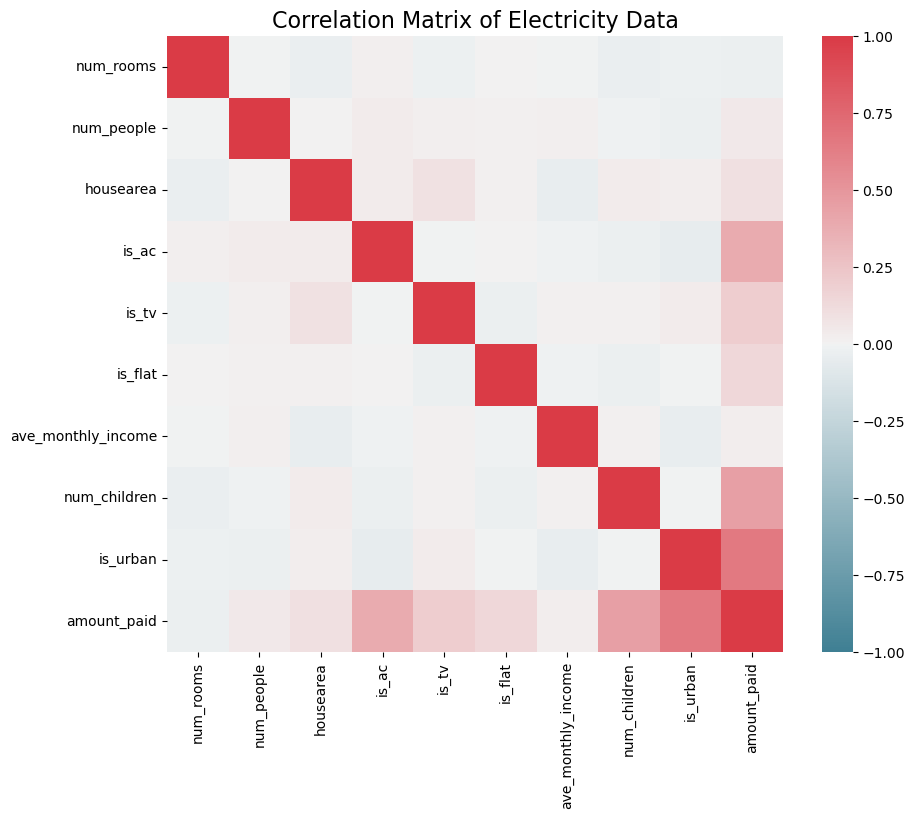

In [24]:
f, ax = plt.subplots(figsize=(10, 8))
corr = electricity.corr()
sns.heatmap(corr,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)
ax.set_title('Correlation Matrix of Electricity Data', fontsize=16)
plt.show()

A more detailed correlation plot dives deeper into these relationships.
* There is a strong positive relationship between the number of children in the household and the amount paid.
* Both the houshold area and the electricity bill amount show a fairly normal distribution.
* Surprisingly, household area is not strongly correlated with the electricity bill amount.

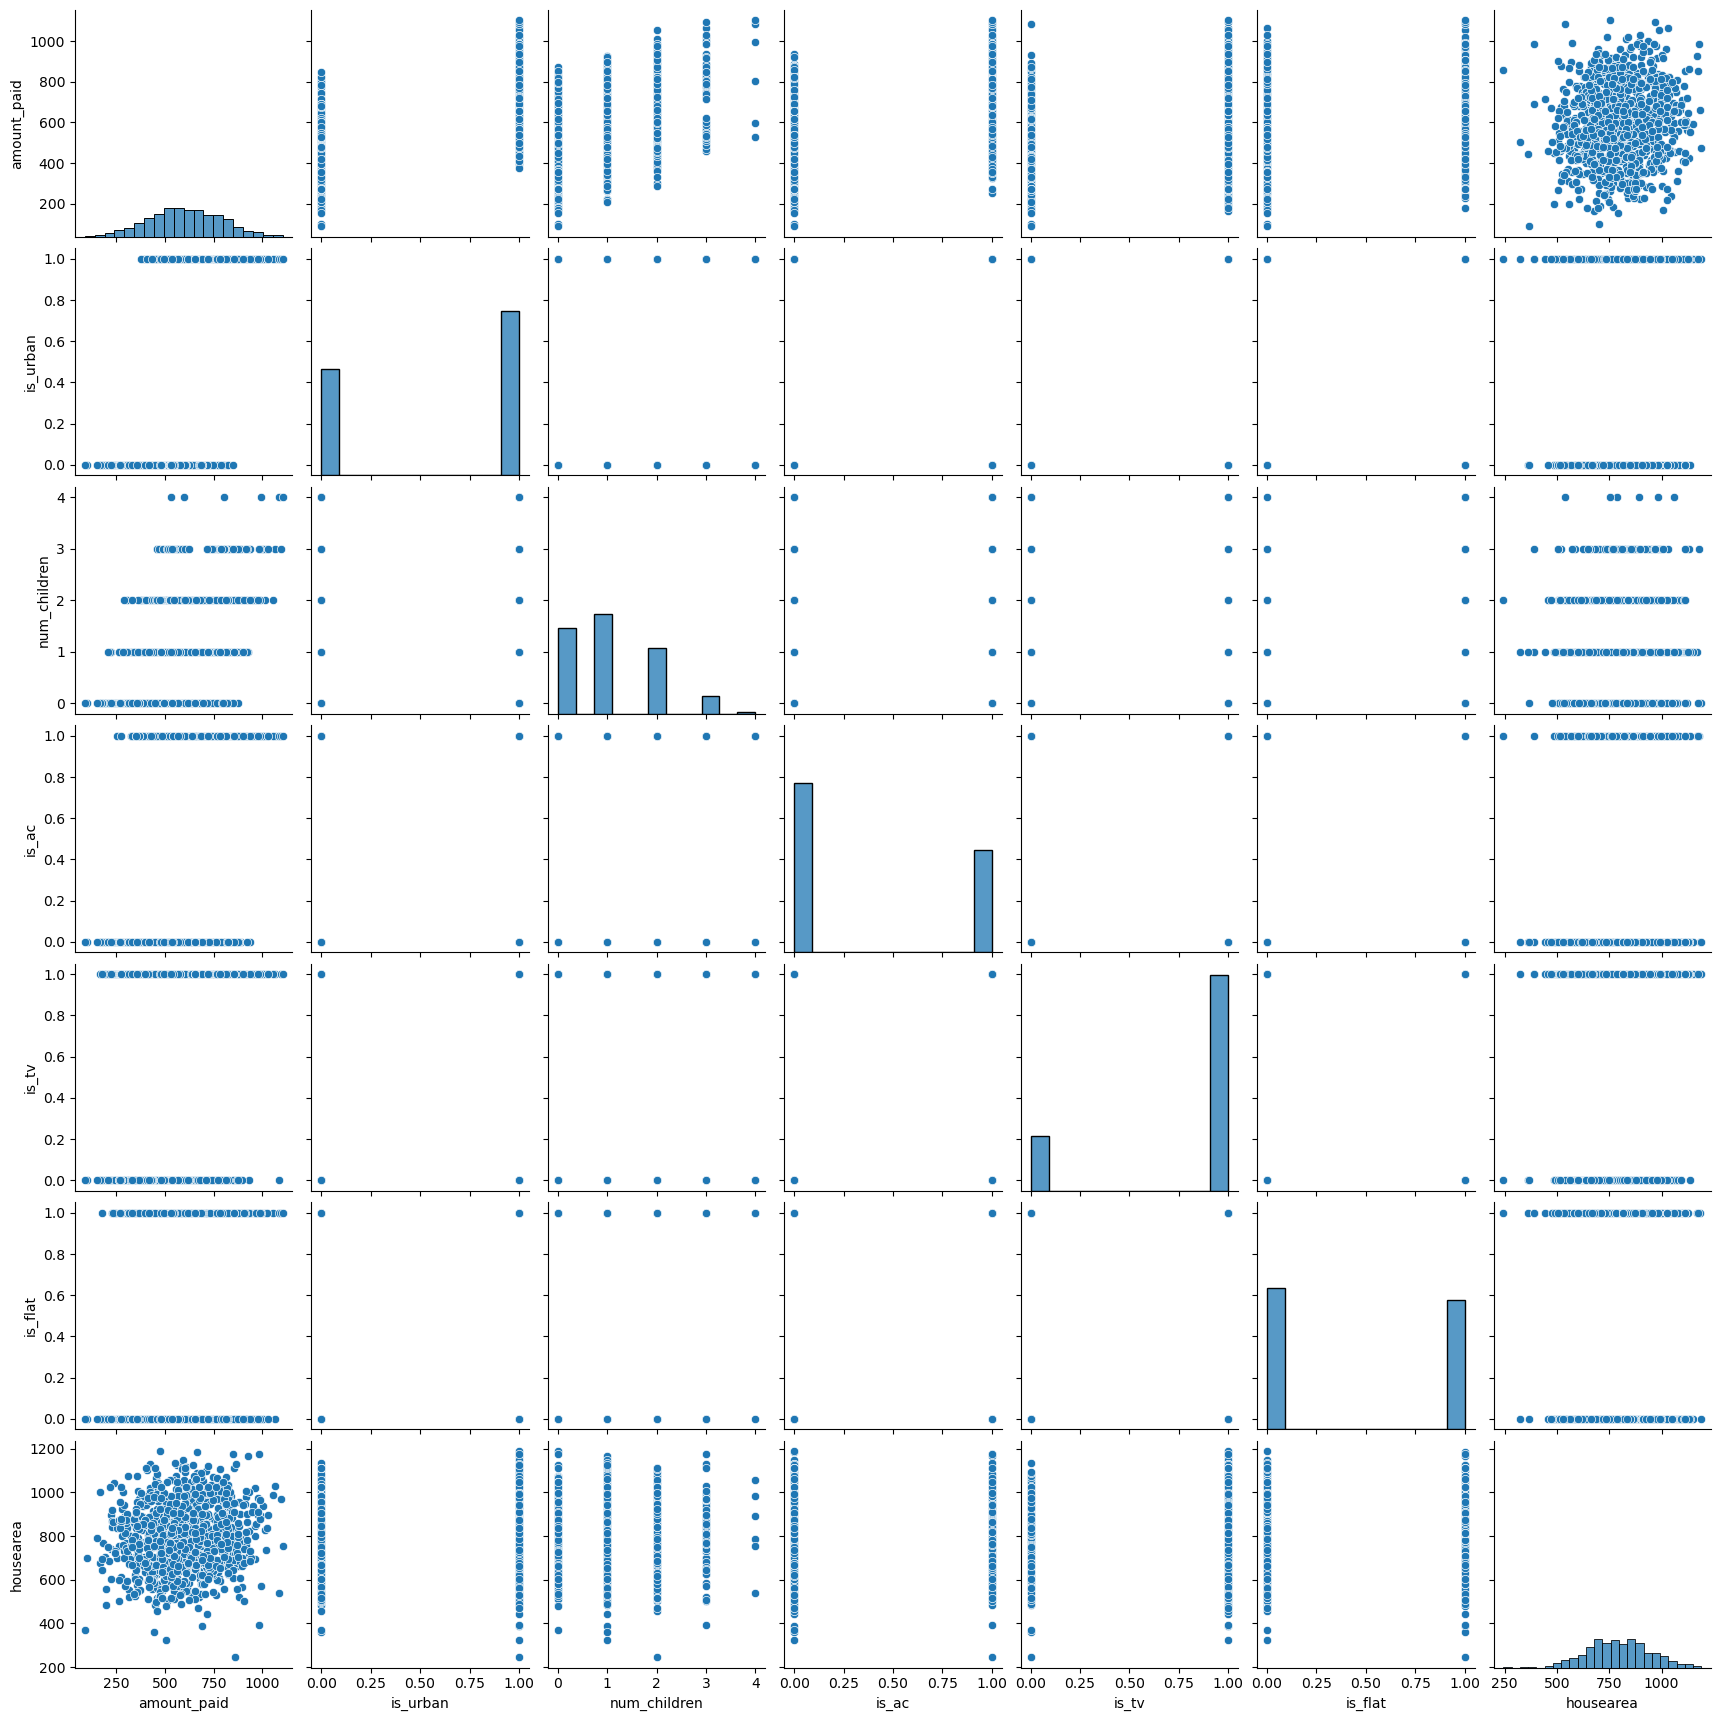

In [43]:
# Create correlogram of variables of interest
var_interest = ["amount_paid","is_urban","num_children","is_ac","is_tv","is_flat","housearea"]
sns.pairplot(electricity[var_interest])
plt.show()


A scatterplot of the dataset shows that the number of children in the household has a strong relationship with the monthly elecricity bill:
* Household electricity bill increases with the number of children in the household.  
* Overall, urban households have a higher electricity bill than rural households.

In [63]:
#Plot a scatter plot of the electricity bill by number of children
#how urban/rural homes by color, and size of the household by point size
fig = px.scatter(electricity, x="amount_paid", y="num_children", color="is_urban",
                 size='housearea', labels={'amount_paid':'Electricity Bill', 'num_children':'No. of Children'})
fig.show()


Creating two subsets of the data to examine the different factors influencing rural household electricity bills, compared to urban households.
* There are more observations for rural households than urban households

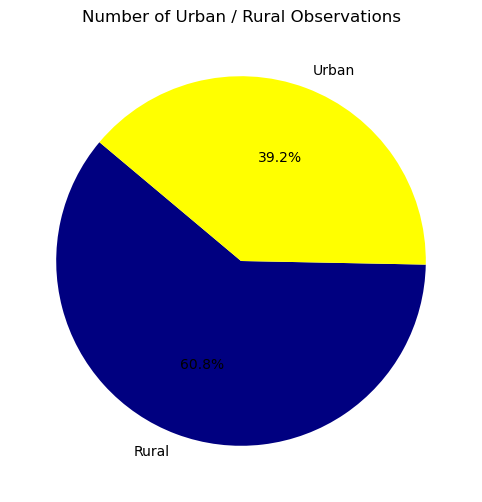

In [64]:
# Filter the data into subsets based on urban/rural status
urban = electricity[(electricity["is_urban"] == "1")]
rural = electricity[(electricity["is_urban"] == "0")]

# Calculate the number of observations in each subset
counts = electricity["is_urban"].value_counts()

# Define the labels and sizes for a pie chart to display the results
labels = ["Rural", "Urban"]
sizes = counts

# Show pie chart of urban/rural observations
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=["navy","yellow"])
plt.title("Number of Urban / Rural Observations")
plt.show()

<html>
<h2 style="background-color: #022851;">
<font size="+2"><br>
    <font color=#FFBF00><b>&nbsp;   &nbsp; Data Modeling </b></font>
    </font>  <br>
</h2>
</html>

<html>
<h2 style="background-color: #022851;">
<font size="+2"><br>
    <font color=#FFBF00><b>&nbsp;   &nbsp; Data Visualization </b></font>
    </font>  <br>
</h2>
</html>

<html>
<h2 style="background-color: #022851;">
<font size="+2"><br>
    <font color=#FFBF00><b>&nbsp;   &nbsp; Results & Recommendations </b></font>
    </font>  <br>
</h2>
</html>